In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path="ex1data1.txt"
data = pd.read_csv(path,header=None,names=["Population","Profit"])

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


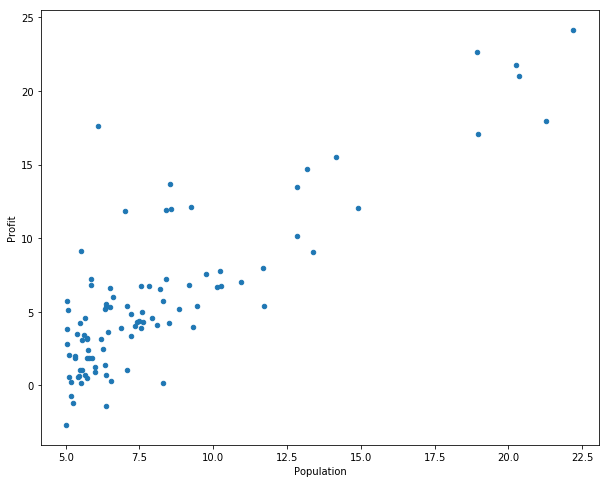

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(10,8))
plt.show()

In [6]:
cols=data.shape[1]#shape，获取第一行的个数
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]
#试试不加Ones一列
#不加Ones，就是设置的b为0

In [7]:
x.head()

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [8]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [9]:
theta = np.matrix(np.array([0]))#不加ONes，theta应该为1，1
x=np.matrix(x.values)
y=np.matrix(y.values)

In [10]:
theta

matrix([[0]])

In [11]:
x.shape,y.shape,theta.shape

((97, 1), (97, 1), (1, 1))

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [12]:
def computerCost(x,y,theta):
    temp=np.power(((x*theta.T)-y),2)#矩阵的乘法
    return np.sum(temp)/(2*len(x))#sum函数，输入矩阵时，将矩阵值相加，输出值。axis参数设置为2，则输出2维矩阵，输出矩阵

In [13]:
Cost=computerCost(x,y,theta)

In [14]:
Cost#得出结果

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [15]:
def gradientDescent(x, y, theta, alpha, iters):#iters为迭代次数
    temp = np.matrix(np.zeros(theta.shape))#zeros用0填充矩阵
    parameters = int(theta.shape[1])#ravel拉长矩阵，shape[0]得到行的个数，shape[1]表示列数。（我是一列的，不需要拉;结果不变）
    cost = np.zeros(iters)
    
    for i in range(iters):#不断迭代
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computerCost(x, y, theta)
        
    return theta, cost

In [16]:
alpha=0.01#学习率
iters=1000#迭代次数

In [17]:
g,cost=gradientDescent(x,y,theta,alpha,iters)
g#求出公式中的ω

matrix([[0.80252685]])

In [18]:
computerCost(x,y,g)

5.858655903330432

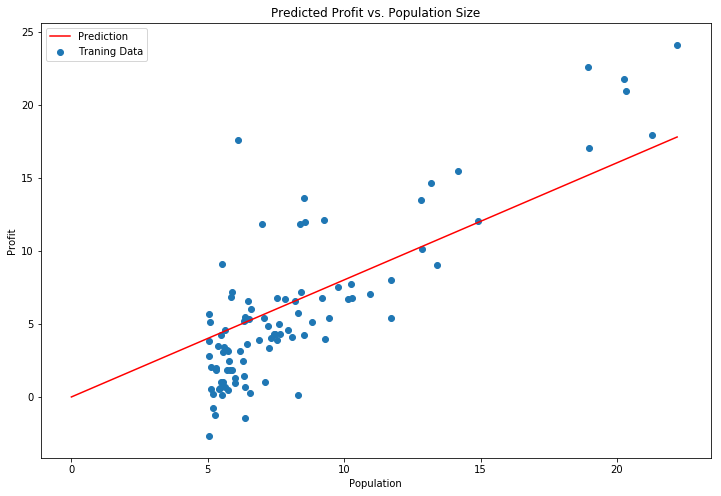

In [19]:
x = np.linspace(0, data.Population.max(), 100)#更改x从0开始
f = g[0,0] * x#只有一个theta，故此处函数应该过原点

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()
#原图像不过原点，现在过原点，

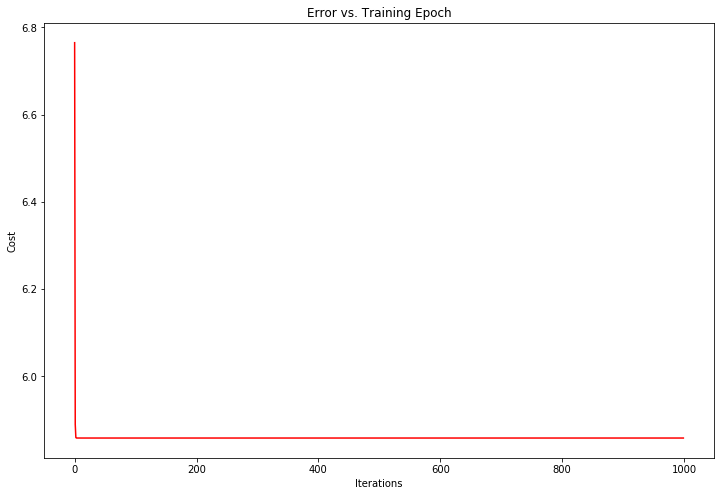

In [20]:
#输出cost下降的过程
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()
#两个备选值ω和b，需要大量迭代才能找出相对优的解。当只有一个ω时，几十次就能找出最优，所以下降非常快！！！！！

In [21]:
cost

array([6.7651737 , 5.8900045 , 5.85973998, 5.85869339, 5.8586572 ,
       5.85865595, 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 ,
       5.8586559 , 5.8586559 , 5.8586559 , 5.8586559 , 5.85865

In [22]:
cost.shape

(1000,)

In [23]:
#取cost前20项
cost=cost[0:12]
#取iters前20项
iters=12

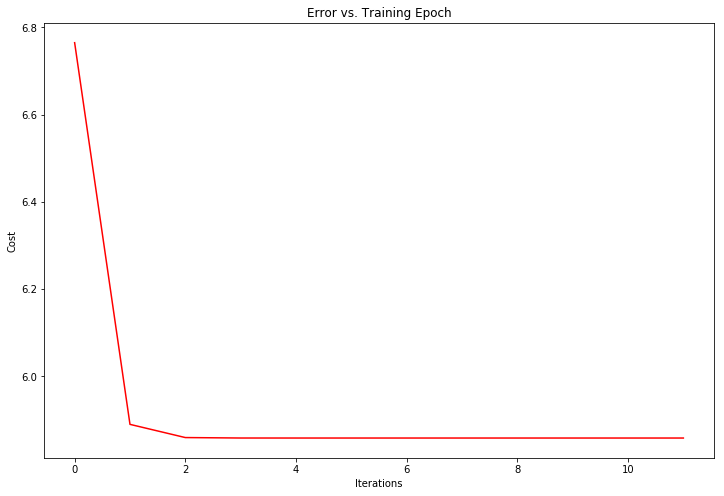

In [24]:
#我们再来看看cost在迭代中的变化，看看下降的过程

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [25]:
#两次就几乎找到了最小Omega！
#🐂